# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('figure', figsize=(10,7))

In [2]:
df0 = pd.read_csv('b1abb33c4f.csv')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
df0.APGAR5.value_counts()

APGAR5
9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: count, dtype: int64

In [5]:
# categorical APGAR5
df1 = df0.copy()
df1.loc[(df1.APGAR5 >= 8) & (df1.APGAR5 <= 10), 'APGAR5_cat'] = 'normal'
df1.loc[(df1.APGAR5 >= 6) & (df1.APGAR5 <= 7), 'APGAR5_cat'] = 'asfixia leve'
df1.loc[(df1.APGAR5 >= 4) & (df1.APGAR5 <= 5), 'APGAR5_cat'] = 'asfixia moderada'
df1.loc[(df1.APGAR5 >= 0) & (df1.APGAR5 <= 3), 'APGAR5_cat'] = 'asfixia severa'

df1[['APGAR5','APGAR5_cat']].value_counts()

APGAR5  APGAR5_cat      
9.0     normal              16076
10.0    normal               8393
8.0     normal               1994
7.0     asfixia leve          241
6.0     asfixia leve           79
5.0     asfixia moderada       45
1.0     asfixia severa         24
4.0     asfixia moderada       23
2.0     asfixia severa         18
0.0     asfixia severa         17
3.0     asfixia severa         15
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

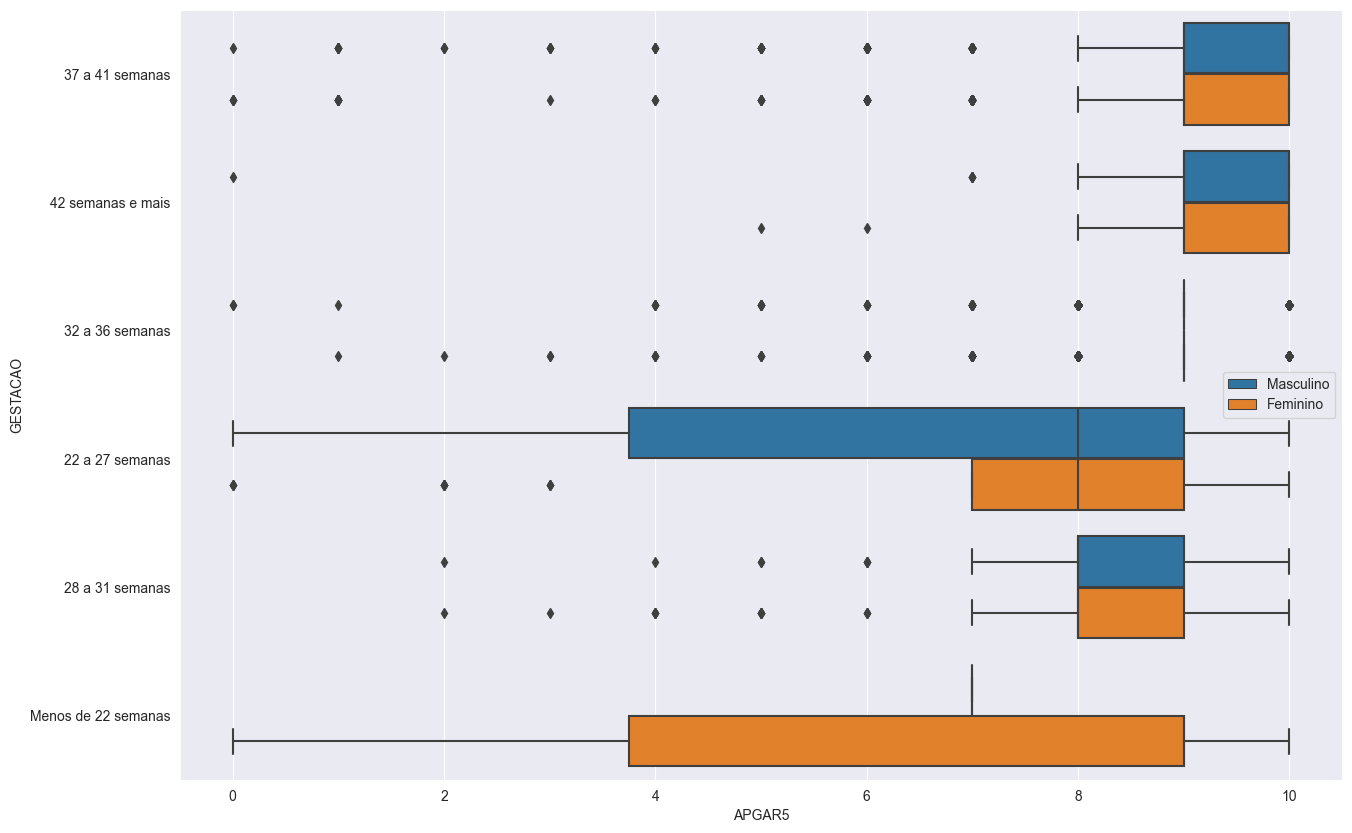

In [6]:
sns.boxplot(
    data=df1
    ,x='APGAR5'
    ,y='GESTACAO'
    ,hue='SEXO'
    ,orient='h'
)

plt.legend(loc='best')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [44]:
tabl=pd.crosstab(df1.GESTACAO, df1.APGAR5_cat)
tabl

APGAR5_cat,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [45]:
tabl_pct=tabl.div(tabl.sum(axis=1), axis=0)
tabl_pct

APGAR5_cat,asfixia leve,asfixia moderada,asfixia severa,normal
GESTACAO,,,,
22 a 27 semanas,0.141176,0.011765,0.247059,0.600000
28 a 31 semanas,0.111111,0.074074,0.018519,0.796296
32 a 36 semanas,0.032677,0.008505,0.003581,0.955237
37 a 41 semanas,0.008702,0.001243,0.001465,0.988589
42 semanas e mais,0.008596,0.001433,0.001433,0.988539
Menos de 22 semanas,0.142857,0.000000,0.285714,0.571429


In [46]:
tabl_pct.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

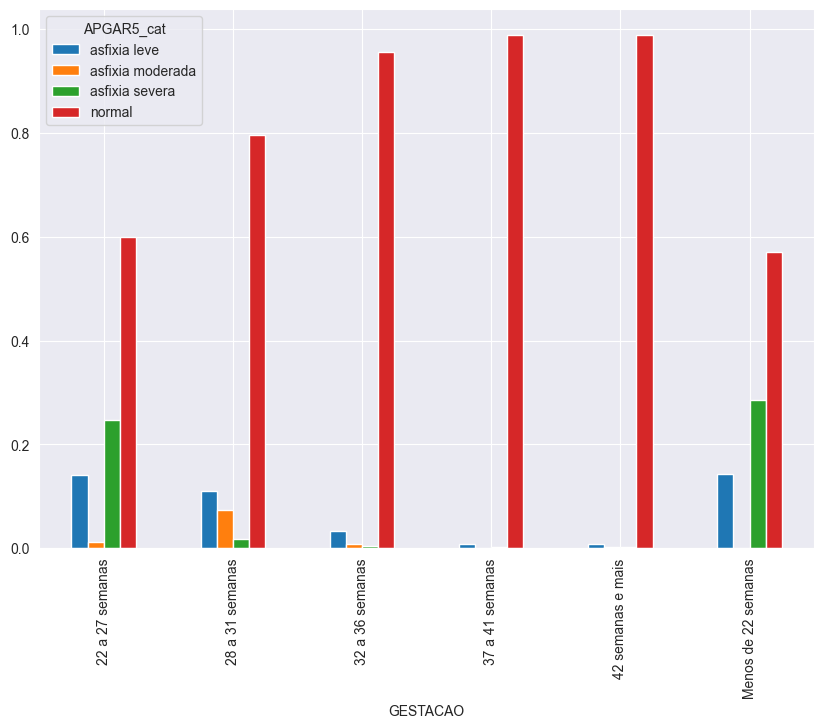

In [47]:
tabl_pct.plot.bar()

> Se tratarmos o termo *prematuro* como *propensão* a sofrer algum tipo de asfixia, principalmente dos tipos moderada ou severa, então podemos sustentar a afirmação médica, tendo em vista que não há, praticamente, nenhum caso de asfixia moderada ou severa para partos a partir de 37 semanas de gestação neste conjunto de dados.
> Entretanto, para todas as categorias de períodos de gestação, temos que o APGAR5 considerado *normal* é legivelmente predominante. Outro agravante é que, no pior caso de parto prematuro, isto é, *menos de 22 semanas*, esperar-se-ia casos de asfixia moderada, junto de asfixia severa, em detrimento de asfixia leve e sem asfixia, isto é, APGAR5 normal.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

>Neste gráfico de distribuição, temos que não

<Axes: label='C', xlabel='PESO', ylabel='GESTACAO'>

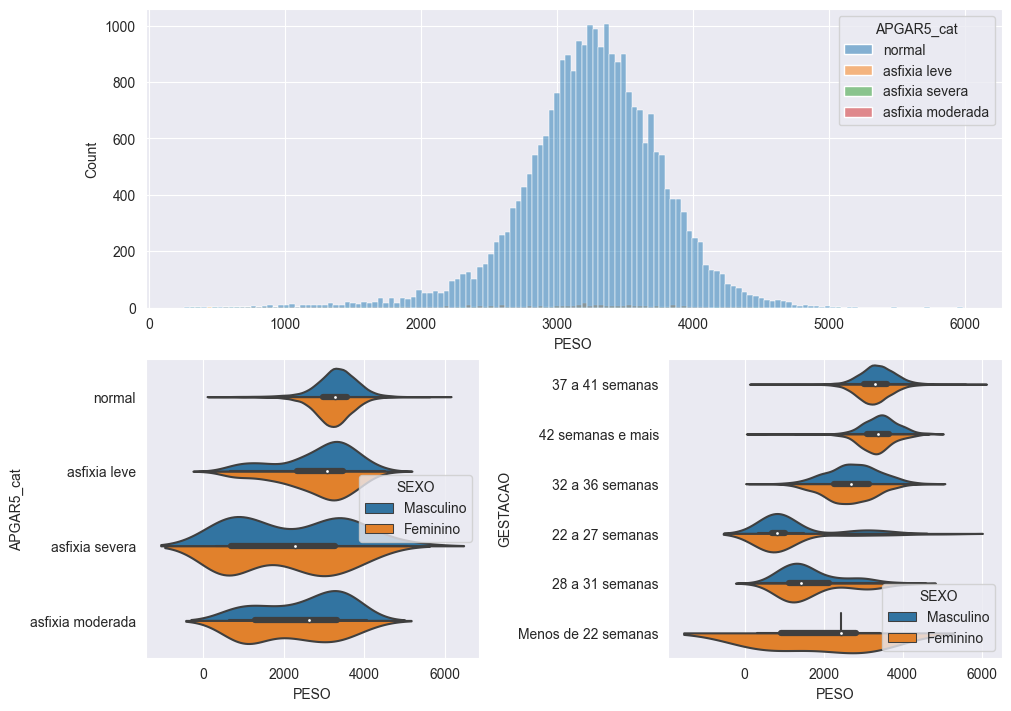

In [67]:
fig = plt.figure(layout='constrained')
axes = fig.subplot_mosaic(
    """
    AA
    BC
    """
)

sns.histplot(ax=axes['A'],
            data=df1
            # , x='APGAR5_cat'
            , x='PESO'
            , hue='APGAR5_cat'
            , alpha=0.5
            )
# plt.figure(figsize=(15,7))

sns.violinplot(ax=axes['B'],
    data=df1
    , y='APGAR5_cat'
    , x='PESO'
    , hue='SEXO'
    , inner='box'
    , split=True
    , fill=False
)

sns.violinplot(ax=axes['C'],
    data=df1
    , y='GESTACAO'
    , x='PESO'
    , hue='SEXO'
    , inner='box'
    , split=True
    , fill=False
)

>A partir dos gráficos acima, não há evidência clara da correlação entre APGAR5 e peso. Um agragavante é que, no gráfico violino entre APGAR5_cat e PESO, existe um relação muito próxima para os caso normal e asfixia leve, porém as observações dos casos de asfixia moderada e severa contradizem a hipótese de correlação.